## Flowers are Pretty

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

sklearn datasets are dictionaries containing the data as well as names of things

In [2]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

data stored in a matrix of shape (n_samples, n_features)

In [6]:
iris.data[:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [7]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
#sns.set_style('white')

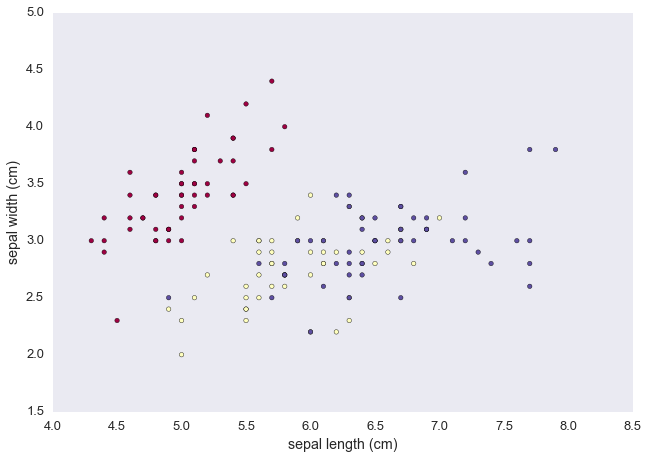

In [9]:
cm = plt.cm.Spectral
ax = df.plot(x=0, y=1, kind='scatter', c='target', colormap=cm, colorbar=False)
ax.grid(False)

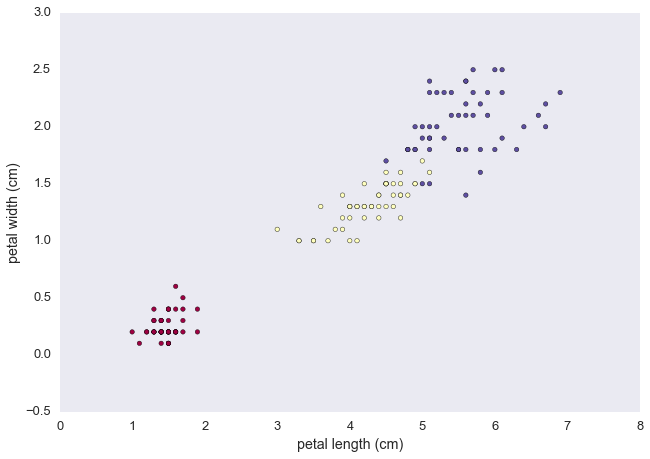

In [10]:
cm = plt.cm.Spectral
ax = df.plot(x=2, y=3, kind='scatter', c='target', colormap=cm, colorbar=False)
ax.grid(False)

## Building a classifier

In [11]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(C=100)

Train the classifier using the petal length and width.

In [35]:
X = df.iloc[:, [2, 3]]
y = df.target
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [36]:
clf.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

The classifier is now trained on data! We can use it to do stuff like predicting iris types based on features we supply.

In [37]:
clf.predict(X.head())

array([0, 0, 0, 0, 0])

How many did we get right?

In [38]:
clf.score(X, y)

0.95999999999999996

Let’s make a plot
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

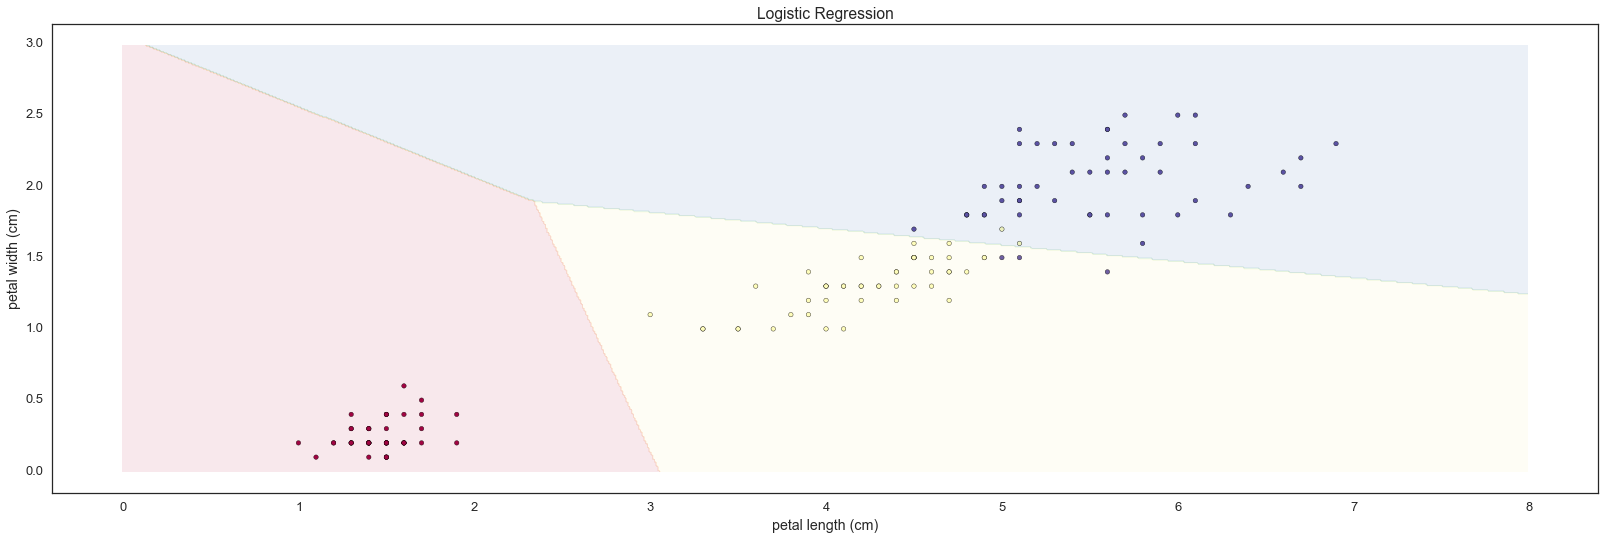

In [43]:
import numpy as np

def plot_predictions(clf):
    # make a grid of predictions to color plot background
    h = 0.01
    x_range = np.arange(0, 8, h)
    y_range = np.arange(0, 3, h)
    xx, yy = np.meshgrid(x_range, y_range)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape[0],xx.shape[1])

    sns.set_style('white')
    ax = df.plot(x=2, y=3, kind='scatter', c='target', cmap=cm, colorbar=False, figsize=(27.7, 8.4 ))
    ax.contourf(x_range, y_range, Z, cmap=cm, alpha=.1)
    ax.grid(False)
    plt.title('Logistic Regression')
    plt.show()
    
plot_predictions(clf)

Note that we're scoring based on the training data. Not cool. We should be scoring using a test set that was set aside and not touched at all during the training process.

In [18]:
from sklearn.cross_validation import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [20]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

(100, 100, 50, 50)


In [21]:
X_train.head()

,petal length (cm),petal width (cm)
81,3.7,1.0
18,1.7,0.3
68,4.5,1.5
54,4.6,1.5
84,4.5,1.5


In [26]:
y_train

81     1
18     0
68     1
54     1
84     1
148    2
0      0
32     0
4      0
17     0
131    2
103    2
51     1
12     0
70     1
121    2
65     1
142    2
11     0
33     0
37     0
38     0
55     1
76     1
53     1
136    2
95     1
31     0
80     1
69     1
      ..
126    2
3      0
85     1
138    2
86     1
57     1
75     1
119    2
137    2
73     1
42     0
59     1
5      0
1      0
145    2
22     0
48     0
143    2
23     0
40     0
56     1
47     0
35     0
36     0
135    2
43     0
78     1
45     0
130    2
92     1
Name: target, dtype: int64

Internally, sklearn uses numpy arrays, not pandas dataframes. It will (usually) accept dataframes but will convert them to arrays for calculations.

Note also that the train/test split was random, so we don't have to worry about our dataframe being ordered by iris type. For unbalanced categories there are functions that preserve the category ratios in the train/test tests.

In [27]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.90000000000000002

In [28]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.755555555556
0.911111111111
0.866666666667
0.755555555556
0.933333333333
0.822222222222
0.844444444444
0.888888888889
0.911111111111
0.733333333333


In [29]:
def mean_score(clf, X, y, test_size=0.33, N=10):
    scores = []
    for _ in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    return(np.mean(scores))

In [30]:
mean_score(LogisticRegression(), X, y, N=100)

0.82533333333333347

Let's use all four features rather than just two.

In [31]:
X4 = df.iloc[:, [0, 1, 2, 3]]
X4.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
mean_score(LogisticRegression(), X4, y, N=100)

0.95022222222222208

In [33]:
for C in range(1, 100):
    print(C, mean_score(LogisticRegression(C=C), X, y, N=100))

(1, 0.83155555555555549)
(2, 0.84911111111111115)
(3, 0.87688888888888894)
(4, 0.89355555555555555)
(5, 0.91088888888888919)
(6, 0.90244444444444438)
(7, 0.91555555555555557)
(8, 0.91577777777777769)
(9, 0.93333333333333324)
(10, 0.92577777777777781)
(11, 0.92266666666666675)
(12, 0.93844444444444453)
(13, 0.93511111111111123)
(14, 0.92933333333333323)
(15, 0.93022222222222239)
(16, 0.93755555555555559)
(17, 0.93866666666666643)
(18, 0.93933333333333335)
(19, 0.93999999999999995)
(20, 0.93422222222222229)
(21, 0.94000000000000017)
(22, 0.940888888888889)
(23, 0.93844444444444453)
(24, 0.94288888888888878)
(25, 0.94444444444444431)
(26, 0.93977777777777793)
(27, 0.93911111111111112)
(28, 0.94222222222222218)
(29, 0.94288888888888889)
(30, 0.94555555555555559)
(31, 0.94399999999999995)
(32, 0.94466666666666665)
(33, 0.94133333333333324)
(34, 0.94399999999999995)
(35, 0.94422222222222219)
(36, 0.95088888888888878)
(37, 0.95222222222222219)
(38, 0.948888888888889)
(39, 0.94955555555555549)